<a href="https://colab.research.google.com/github/Davidgr11/Computational_Intelligence_AI_DataMining/blob/main/ConvolutionalNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot
import numpy

from tensorflow.keras.datasets.mnist import load_data
#from tensorflow.keras.datasets.cifar import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D
from tensorflow.keras.layers import Flatten, Dropout

In [ ]:
(X,y),(examenX,exameny)=load_data()

In [ ]:
X.shape

(60000, 28, 28)

In [ ]:
examenX.shape

(10000, 28, 28)

In [ ]:
y.shape

(60000,)

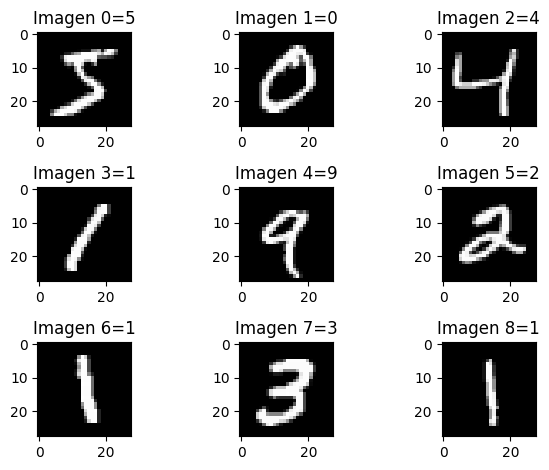

In [ ]:
for i in range(9):
  pyplot.subplot(3,3,i+1)
  pyplot.imshow(X[i],cmap=pyplot.get_cmap('gray'))
  pyplot.title(label='Imagen {}={}'.format(i,y[i]))
pyplot.tight_layout()
pyplot.show()

In [ ]:
X=X.reshape((X.shape[0],X.shape[1],X.shape[2],1))
X.shape

(60000, 28, 28, 1)

In [ ]:
examenX=examenX.reshape((examenX.shape[0],
                         examenX.shape[1],
                         examenX.shape[2],1))
examenX.shape

(10000, 28, 28, 1)

In [ ]:
categorias=len(numpy.unique(y))
categorias

10

In [ ]:
numpy.max(X[0])

255

In [ ]:
numpy.min(X[0])

0

In [ ]:
X=X.astype('float32')/255

In [ ]:
numpy.max(X[0])

1.0

In [ ]:
examenX=examenX.astype('float32')/255
numpy.max(examenX[0])

1.0

In [ ]:
red=Sequential()
red.add(Conv2D(32,(5,5),activation='relu',
               input_shape=X.shape[1:]))
red.add(MaxPool2D((2,2)))
red.add(Flatten())
red.add(Dense(100,activation='relu'))
red.add(Dropout(0.5))
red.add(Dense(categorias,activation='softmax'))
red.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
red.fit(X,y,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 29s 59ms/step - loss: 0.3418 - accuracy: 0.8980
Epoch 2/5
469/469 [==============================] - 27s 59ms/step - loss: 0.1201 - accuracy: 0.9654
Epoch 3/5
469/469 [==============================] - 29s 61ms/step - loss: 0.0889 - accuracy: 0.9735
Epoch 4/5
469/469 [==============================] - 27s 57ms/step - loss: 0.0774 - accuracy: 0.9764
Epoch 5/5
469/469 [==============================] - 27s 57ms/step - loss: 0.0655 - accuracy: 0.9804


In [ ]:
loss,acc=red.evaluate(examenX,exameny)
acc

313/313 [==============================] - 2s 6ms/step - loss: 0.0381 - accuracy: 0.9874


0.9873999953269958

1/1 [==============================] - 0s 22ms/step


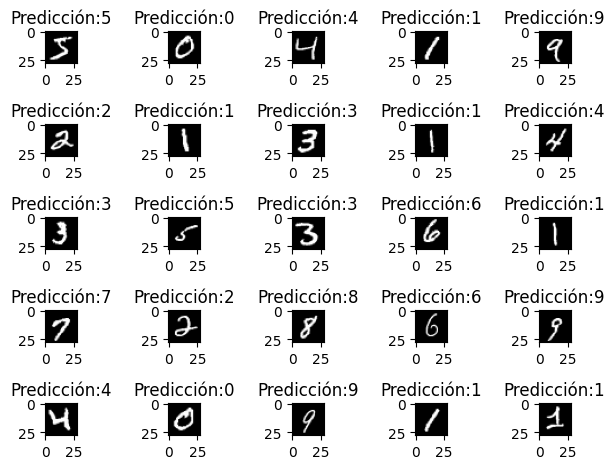

In [ ]:
salidas=[]
for i in range(25):
  salidas.append(numpy.argmax(
      red.predict(numpy.asarray([X[i]]))))
for i in range(25):
  pyplot.subplot(5,5,i+1)
  pyplot.imshow(X[i],cmap=pyplot.get_cmap('gray'))
  pyplot.title(label='Predicción:{}'.format(
      salidas[i]))
pyplot.tight_layout()
pyplot.show()